<a href="https://colab.research.google.com/github/mahmoud25112/AI-projects/blob/main/Stage1_HFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This will be our first try for stock market predictions

We will be using:

- Classification

- Regression

our target variable will be the log return of the stock then we can calculate the actual return later on


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
# Additional libraries as needed

#regulrization
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# Technical Analysis library
!pip install ta
import ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=8df8d207c97e92a3179bd224d3cbbbd292ddd27c4337960a9fbdd4e6a6570dfd
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


In [ ]:
!pip install alpha_vantage
from alpha_vantage.timeseries import TimeSeries

api_key = 'KS6CZ2I24R7GCSR0'#make sure to remove api key at the end before saving
ts = TimeSeries(key=api_key, output_format='pandas')


In [ ]:
data_tesla, meta_data_tesla = ts.get_intraday(symbol='TSLA', interval='1min', outputsize='full')
data_rivian, meta_data_rivian = ts.get_intraday(symbol='RIVN', interval='1min', outputsize='full')
data_lucid, meta_data_lucid = ts.get_intraday(symbol='LCID', interval='1min', outputsize='full')
data_ford, meta_data_ford = ts.get_intraday(symbol='F', interval='1min', outputsize='full')


In [ ]:
data_tesla['Stock_name'] = 'Tesla'
data_tesla = data_tesla.sort_index(ascending=True)

data_tesla.rename(columns={'4. close': 'close_price',
                           '1. open': 'open_price',
                           '2. high': 'high_price',
                           '3. low': 'low_price',
                           '5. volume': 'volume'}, inplace=True)

print(data_tesla.info())
print()
print(data_tesla.head())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21120 entries, 2024-10-01 04:00:00 to 2024-10-30 19:59:00
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   open_price   21120 non-null  float64
 1   high_price   21120 non-null  float64
 2   low_price    21120 non-null  float64
 3   close_price  21120 non-null  float64
 4   volume       21120 non-null  float64
 5   Stock_name   21120 non-null  object 
dtypes: float64(5), object(1)
memory usage: 1.1+ MB
None

                     open_price  high_price  low_price  close_price  volume  \
date                                                                          
2024-10-01 04:00:00      262.44      262.85     261.65       262.54  3942.0   
2024-10-01 04:01:00      262.42      262.83     262.41       262.56  2785.0   
2024-10-01 04:02:00      262.65      262.65     262.32       262.37  3086.0   
2024-10-01 04:03:00      262.39      262.51     262.16       262.17 

In [ ]:
data_rivian['Stock_name'] = 'rivian'
data_rivian = data_rivian.sort_index(ascending=True)

data_rivian.rename(columns={'4. close': 'close_price',
                           '1. open': 'open_price',
                           '2. high': 'high_price',
                           '3. low': 'low_price',
                           '5. volume': 'volume'}, inplace=True)

print(data_rivian.head())
print()
print(data_rivian.info())

                     open_price  high_price  low_price  close_price  volume  \
date                                                                          
2024-10-01 04:00:00       11.26       11.34      11.26        11.32   330.0   
2024-10-01 04:01:00       11.29       11.29      11.26        11.26    14.0   
2024-10-01 04:02:00       11.29       11.29      11.27        11.28    34.0   
2024-10-01 04:03:00       11.27       11.28      11.27        11.28    11.0   
2024-10-01 04:04:00       11.27       11.28      11.27        11.28    36.0   

                    Stock_name  
date                            
2024-10-01 04:00:00     rivian  
2024-10-01 04:01:00     rivian  
2024-10-01 04:02:00     rivian  
2024-10-01 04:03:00     rivian  
2024-10-01 04:04:00     rivian  

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19168 entries, 2024-10-01 04:00:00 to 2024-10-30 19:59:00
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       -----------

In [ ]:
data_lucid['Stock_name'] = 'Lucid'

data_lucid.rename(columns={'4. close': 'close_price',
                           '1. open': 'open_price',
                           '2. high': 'high_price',
                           '3. low': 'low_price',
                           '5. volume': 'volume'}, inplace=True)

print(data_lucid.head())

print()
print(data_lucid.info())

                     open_price  high_price  low_price  close_price  volume  \
date                                                                          
2024-10-01 04:00:00        3.53        3.54       3.53         3.53    48.0   
2024-10-01 04:01:00        3.54        3.55       3.54         3.55    55.0   
2024-10-01 04:02:00        3.55        3.55       3.55         3.55     7.0   
2024-10-01 04:03:00        3.55        3.57       3.55         3.57    36.0   
2024-10-01 04:04:00        3.56        3.57       3.56         3.57    33.0   

                    Stock_name  
date                            
2024-10-01 04:00:00      Lucid  
2024-10-01 04:01:00      Lucid  
2024-10-01 04:02:00      Lucid  
2024-10-01 04:03:00      Lucid  
2024-10-01 04:04:00      Lucid  

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19990 entries, 2024-10-01 04:00:00 to 2024-10-30 19:59:00
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       -----------

In [ ]:
data_lucid = data_lucid.sort_index(ascending=True)
print(data_lucid.head())
print()
print(data_lucid.info())

                     open_price  high_price  low_price  close_price  volume  \
date                                                                          
2024-10-01 04:00:00        3.53        3.54       3.53         3.53    48.0   
2024-10-01 04:01:00        3.54        3.55       3.54         3.55    55.0   
2024-10-01 04:02:00        3.55        3.55       3.55         3.55     7.0   
2024-10-01 04:03:00        3.55        3.57       3.55         3.57    36.0   
2024-10-01 04:04:00        3.56        3.57       3.56         3.57    33.0   

                    Stock_name  
date                            
2024-10-01 04:00:00      Lucid  
2024-10-01 04:01:00      Lucid  
2024-10-01 04:02:00      Lucid  
2024-10-01 04:03:00      Lucid  
2024-10-01 04:04:00      Lucid  

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19990 entries, 2024-10-01 04:00:00 to 2024-10-30 19:59:00
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       -----------

In [ ]:
data_ford['Stock_name'] = 'Ford'
data_ford = data_ford.sort_index(ascending=True)
data_ford.rename(columns={'4. close': 'close_price',
                           '1. open': 'open_price',
                           '2. high': 'high_price',
                           '3. low': 'low_price',
                           '5. volume': 'volume'}, inplace=True)
data_ford.info()
print()
data_ford.head()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18246 entries, 2024-10-01 04:00:00 to 2024-10-30 19:59:00
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   open_price   18246 non-null  float64
 1   high_price   18246 non-null  float64
 2   low_price    18246 non-null  float64
 3   close_price  18246 non-null  float64
 4   volume       18246 non-null  float64
 5   Stock_name   18246 non-null  object 
dtypes: float64(5), object(1)
memory usage: 997.8+ KB



open_price  high_price  low_price  close_price   volume  \
date                                                                           
2024-10-01 04:00:00       10.66       10.88      10.66        10.81  25931.0   
2024-10-01 04:01:00       10.81       10.83      10.81        10.81  14273.0   
2024-10-01 04:02:00       10.81       10.82      10.81        10.81   2559.0   
2024-10-01 04:03:00       10.81       10.81      10.78        10.78  12332.0   
2024-10-01 04:04:00       10.78       10.79      10.77        10.77   1246.0   

                    Stock_name  
date                            
2024-10-01 04:00:00       Ford  
2024-10-01 04:01:00       Ford  
2024-10-01 04:02:00       Ford  
2024-10-01 04:03:00       Ford  
2024-10-01 04:04:00       Ford

In [ ]:
data_tesla.isnull().sum()

open_price     0
high_price     0
low_price      0
close_price    0
volume         0
Stock_name     0
dtype: int64

we're calculating the log return at each interval using the closing price divided by the future closing price

Reason for choosing Log return as target
- Time Additivity: Log returns over multiple periods can be summed to obtain the total log return over that period.
- Normality Assumption: Log returns are more likely to be normally distributed, which is a common assumption in many statistical models.

We will be also using the log return to calculate volatility and sharpe ratio later on

In [ ]:
data_tesla['log_return'] = np.log(data_tesla['close_price'] / data_tesla['close_price'].shift(1))

In [ ]:
holding_period = 5  # for 5-minute holding period
data_tesla['future_return'] = data_tesla['close_price'].shift(-holding_period) / data_tesla['close_price'] - 1


In [ ]:
data_tesla['log_return'] = np.log(data_tesla['4. close'] / data_tesla['4. close'].shift(1))
holding_period = 5  # for 5-minute holding period
data_tesla['future_return'] = data_tesla['4. close'].shift(-holding_period) / data_tesla['4. close'] - 1
data_tesla['target_reg'] = data_tesla['future_return']
# direct prediction or returns using regression
data_tesla['target_cls'] = np.where(data_tesla['future_return'] > 0, 1, 0)
# if future return is positive set label to 1 if negative set it to 0
data_tesla['ma_short'] = data_tesla['4. close'].rolling(window=5).mean()
data_tesla['ma_short'] = data_tesla['ma_short'].shift(1)  # Shift to prevent using current data

data_tesla['ma_short'] = data_tesla['4. close'].rolling(window=5).mean().shift(1)
data_tesla['ma_long'] = data_tesla['4. close'].rolling(window=20).mean().shift(1)


data_tesla['rsi'] = ta.momentum.RSIIndicator(data_tesla['4. close'], window=14).rsi().shift(1)
#Calculates the RSI and shifts it to use only past data.
data_tesla['volatility'] = data_tesla['log_return'].rolling(window=10).std().shift(1)
#Calculates the rolling standard deviation of log returns and shifts it.
### Rolling Standard Deviation:

# Volume Indicators:
# On-Balance Volume (OBV):


data_tesla['obv'] = ta.volume.OnBalanceVolumeIndicator(data_tesla['4. close'], data_tesla['5. volume']).on_balance_volume().shift(1)

data_tesla['lagged_return_1'] = data_tesla['log_return'].shift(1)
data_tesla['lagged_return_2'] = data_tesla['log_return'].shift(2)
# Creates lagged versions of log returns to capture momentum or reversal patterns.
# Lagged returns help the model

### regression approach

In [ ]:
data_tesla['target_reg'] = data_tesla['future_return']
# direct prediction or returns using regression


0 missing values

### classification approach

In [ ]:
data_tesla['target_cls'] = np.where(data_tesla['future_return'] > 0, 1, 0)
# if future return is positive set label to 1 if negative set it to 0

In [ ]:
data_tesla['ma_short'] = data_tesla['close_price'].rolling(window=5).mean()
data_tesla['ma_short'] = data_tesla['ma_short'].shift(1)  # Shift to prevent using current data


In [ ]:
data_tesla.isnull().sum()

1. open             0
2. high             0
3. low              0
4. close            0
5. volume           0
Stock_name          0
log_return          1
future_return       5
target_reg          5
target_cls          0
ma_short            5
ma_long            20
rsi                14
volatility         11
obv                 1
lagged_return_1     2
lagged_return_2     3
dtype: int64

In [ ]:
data_tesla.dropna(inplace=True)


## Avoiding Data Leakage by Lagging Features

Lagging Moving Averages

- purpose:Calculates the short-term and long-term moving averages of the closing price and shifts them to ensure they only use past data.
- Data leaking prevnetion by shifting the features to prevent the model from accessing future data


In [ ]:
data_tesla['ma_short'] = data_tesla['close_price'].rolling(window=5).mean().shift(1)
data_tesla['ma_long'] = data_tesla['close_price'].rolling(window=20).mean().shift(1)


data_tesla['rsi'] = ta.momentum.RSIIndicator(data_tesla['close_price'], window=14).rsi().shift(1)
#Calculates the RSI and shifts it to use only past data.


In [ ]:
## macd = ta.trend.MACD(data_tesla['4. close']).macd_diff().shift(1)
## data_tesla['macd'] = macd
# Moving Average Convergence Divergence (MACD):

### Volatility Measures

In [ ]:
data_tesla['volatility'] = data_tesla['log_return'].rolling(window=10).std().shift(1)
#Calculates the rolling standard deviation of log returns and shifts it.
### Rolling Standard Deviation:

# Volume Indicators:
# On-Balance Volume (OBV):


data_tesla['obv'] = ta.volume.OnBalanceVolumeIndicator(data_tesla['close_price'], data_tesla['volume']).on_balance_volume().shift(1)


In [ ]:
data_tesla['lagged_return_1'] = data_tesla['log_return'].shift(1)
data_tesla['lagged_return_2'] = data_tesla['log_return'].shift(2)
# Creates lagged versions of log returns to capture momentum or reversal patterns.
# Lagged returns help the model understand how past returns influence future returns.

In [ ]:
data_tesla.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21090 entries, 2024-10-01 04:25:00 to 2024-10-30 19:54:00
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   open_price       21090 non-null  float64
 1   high_price       21090 non-null  float64
 2   low_price        21090 non-null  float64
 3   close_price      21090 non-null  float64
 4   volume           21090 non-null  float64
 5   Stock_name       21090 non-null  object 
 6   log_return       21090 non-null  float64
 7   future_return    21090 non-null  float64
 8   target_cls       21090 non-null  int64  
 9   ma_short         21090 non-null  float64
 10  ma_long          21090 non-null  float64
 11  rsi              21090 non-null  float64
 12  volatility       21090 non-null  float64
 13  obv              21090 non-null  float64
 14  lagged_return_1  21090 non-null  float64
 15  lagged_return_2  21090 non-null  float64
 16  target_reg       21090 

In [ ]:
data_tesla.dropna(inplace=True)
data_tesla.head(10)

open_price  high_price  low_price  close_price  volume  \
date                                                                          
2024-10-01 04:25:00      262.15      262.15     262.10       262.14   699.0   
2024-10-01 04:26:00      262.11      262.16     262.08       262.08   396.0   
2024-10-01 04:27:00      262.14      262.21     262.14       262.20   657.0   
2024-10-01 04:28:00      262.21      262.21     262.14       262.18   396.0   
2024-10-01 04:29:00      262.11      262.12     262.00       262.10  1205.0   
2024-10-01 04:30:00      262.04      262.06     262.00       262.02  1287.0   
2024-10-01 04:31:00      262.09      262.20     262.02       262.13  2391.0   
2024-10-01 04:32:00      262.20      262.23     262.06       262.21  1061.0   
2024-10-01 04:33:00      262.25      262.28     262.20       262.21   217.0   
2024-10-01 04:34:00      262.21      262.21     262.11       262.12  1021.0   

                    Stock_name  log_return  future_return  target_cls  \
date                                                                    
2024-10-01 04:25:00      Tesla   -0.000038      -0.000458           0   
2024-10-01 04:26:00      Tesla   -0.000229       0.000191           1   
2024-10-01 04:27:00      Tesla    0.000458       0.000038           1   
2024-10-01 04:28:00      Tesla   -0.000076       0.000114           1   
2024-10-01 04:29:00      Tesla   -0.000305       0.000076           1   
2024-10-01 04:30:00      Tesla   -0.000305       0.000534           1   
2024-10-01 04:31:00      Tesla    0.000420       0.000267           1   
2024-10-01 04:32:00      Tesla    0.000305       0.000305           1   
2024-10-01 04:33:00      Tesla    0.000000      -0.000038           0   
2024-10-01 04:34:00      Tesla   -0.000343       0.000305           1   

                     ma_short   ma_long        rsi  volatility     obv  \
date                                                                     
2024-10-01 04:25:00   262.250  262.1465  48.353026    0.000506 -3273.0   
2024-10-01 04:26:00   262.224  262.1410  47.880124    0.000504 -3972.0   
2024-10-01 04:27:00   262.176  262.1470  45.034183    0.000512 -4368.0   
2024-10-01 04:28:00   262.156  262.1465  51.272398    0.000495 -3711.0   
2024-10-01 04:29:00   262.150  262.1480  50.248806    0.000413 -4107.0   
2024-10-01 04:30:00   262.140  262.1450  46.269708    0.000316 -5312.0   
2024-10-01 04:31:00   262.116  262.1385  42.633918    0.000253 -6599.0   
2024-10-01 04:32:00   262.126  262.1350  48.613101    0.000290 -4208.0   
2024-10-01 04:33:00   262.128  262.1405  52.491397    0.000313 -3147.0   
2024-10-01 04:34:00   262.134  262.1470  52.491397    0.000294 -2930.0   

                     lagged_return_1  lagged_return_2  target_reg  
date                                                               
2024-10-01 04:25:00        -0.000229        -0.000343   -0.000458  
2024-10-01 04:26:00        -0.000038        -0.000229    0.000191  
2024-10-01 04:27:00        -0.000229        -0.000038    0.000038  
2024-10-01 04:28:00         0.000458        -0.000229    0.000114  
2024-10-01 04:29:00        -0.000076         0.000458    0.000076  
2024-10-01 04:30:00        -0.000305        -0.000076    0.000534  
2024-10-01 04:31:00        -0.000305        -0.000305    0.000267  
2024-10-01 04:32:00         0.000420        -0.000305    0.000305  
2024-10-01 04:33:00         0.000305         0.000420   -0.000038  
2024-10-01 04:34:00         0.000000         0.000305    0.000305

In [ ]:
data_tesla.describe()

open_price    high_price     low_price   close_price        volume  \
count  21090.000000  21090.000000  21090.000000  21090.000000  2.109000e+04   
mean     238.673203    239.028815    238.258484    238.672085  9.005711e+04   
std       17.405207     17.782276     17.659264     17.408419  2.676513e+05   
min      185.502200    212.270000    157.110000    182.743300  1.300000e+01   
25%      220.196250    220.301250    220.040000    220.200000  2.114250e+03   
50%      241.840000    241.990000    241.600000    241.840000  1.116700e+04   
75%      254.800000    255.272500    254.250000    254.792500  1.058442e+05   
max      285.860000    363.327000    272.910600    297.518400  1.746015e+07   

         log_return  future_return    target_cls      ma_short       ma_long  \
count  21090.000000   21090.000000  21090.000000  21090.000000  21090.000000   
mean      -0.000001       0.000011      0.483499    238.672949    238.675044   
std        0.005663       0.005809      0.499740     17.391186     17.386127   
min       -0.304086      -0.262945      0.000000    212.196860    212.350855   
25%       -0.000281      -0.000655      0.000000    220.200250    220.192489   
50%        0.000000       0.000000      0.000000    241.840060    241.831360   
75%        0.000287       0.000643      1.000000    254.729210    254.634183   
max        0.407233       0.355491      1.000000    272.990780    272.640395   

                rsi    volatility           obv  lagged_return_1  \
count  21090.000000  21090.000000  2.109000e+04     21090.000000   
mean      49.992040      0.000963 -2.432669e+07        -0.000001   
std       11.798612      0.005855  1.351962e+07         0.005663   
min        0.458375      0.000023 -4.464022e+07        -0.304086   
25%       42.598547      0.000279 -3.692045e+07        -0.000281   
50%       49.964020      0.000477 -3.184184e+07         0.000000   
75%       57.165937      0.000812 -1.137441e+07         0.000287   
max       97.998629      0.200356  1.406667e+06         0.407233   

       lagged_return_2    target_reg  
count     21090.000000  21090.000000  
mean         -0.000001      0.000011  
std           0.005663      0.005809  
min          -0.304086     -0.262945  
25%          -0.000281     -0.000655  
50%           0.000000      0.000000  
75%           0.000287      0.000643  
max           0.407233      0.355491

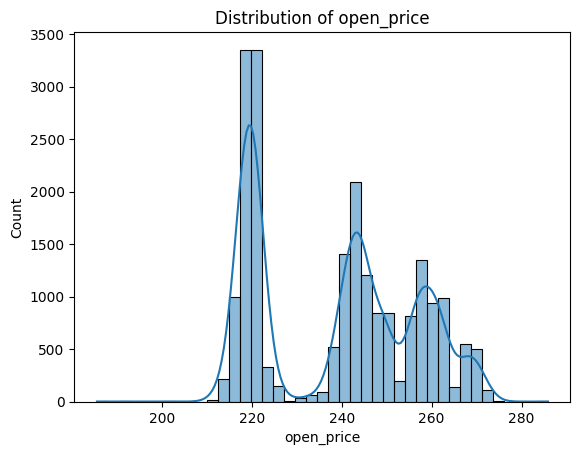

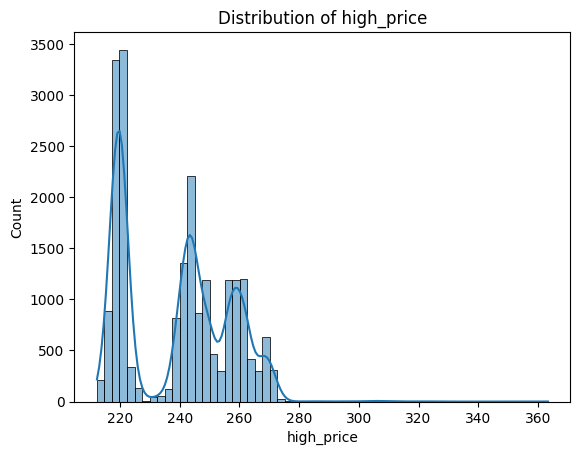

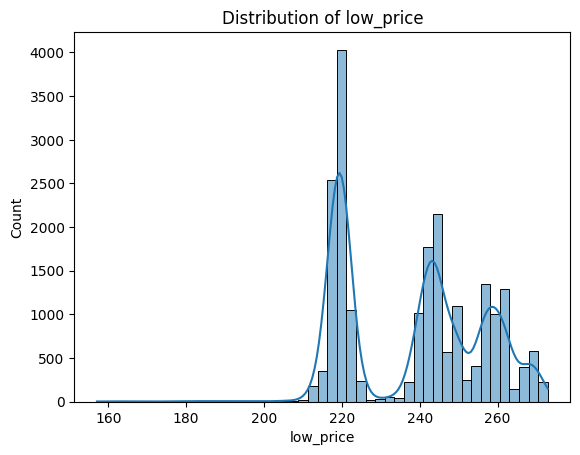

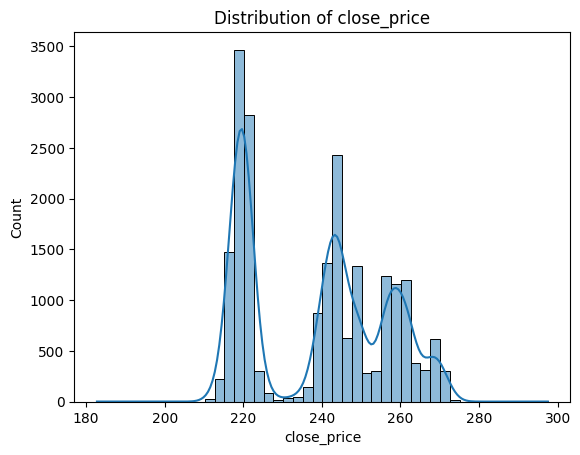

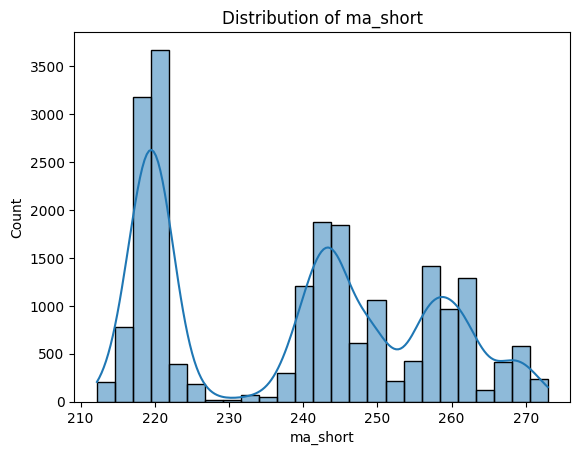

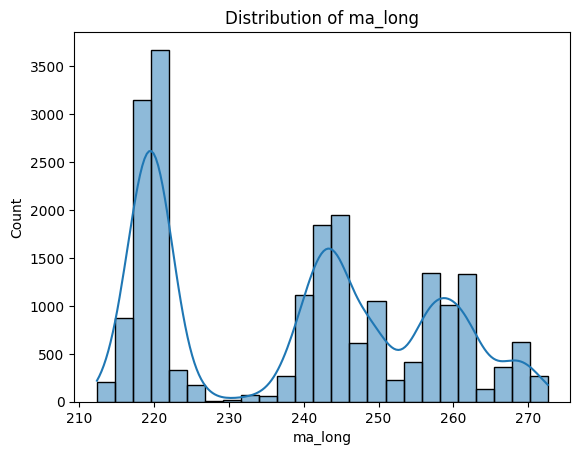

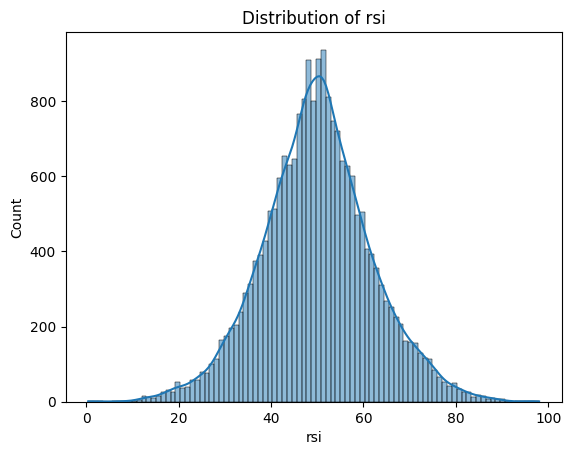

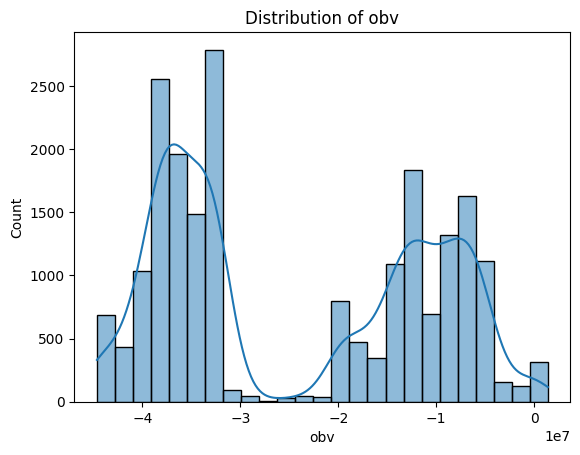

In [ ]:
columns = ['open_price', 'high_price', 'low_price', 'close_price',
           'ma_short', 'ma_long', 'rsi', 'obv'
           ]
for column in columns:
    sns.histplot(data_tesla[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

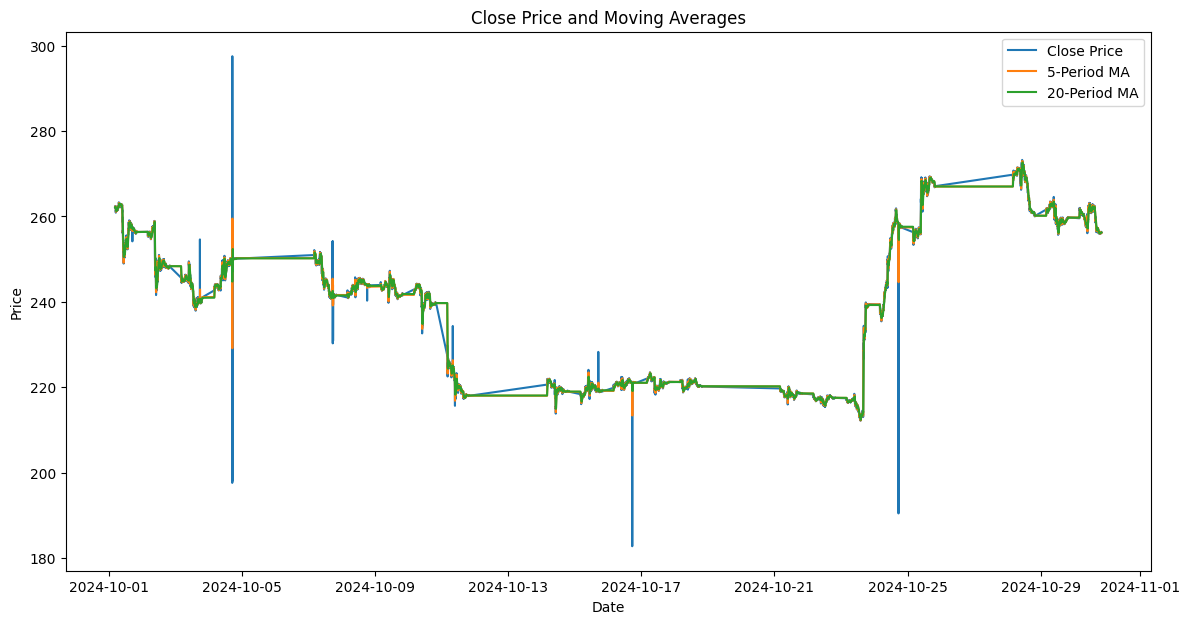

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(data_tesla.index, data_tesla['close_price'], label='Close Price')
plt.plot(data_tesla.index, data_tesla['ma_short'], label='5-Period MA')
plt.plot(data_tesla.index, data_tesla['ma_long'], label='20-Period MA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Close Price and Moving Averages')
plt.legend()
plt.show()

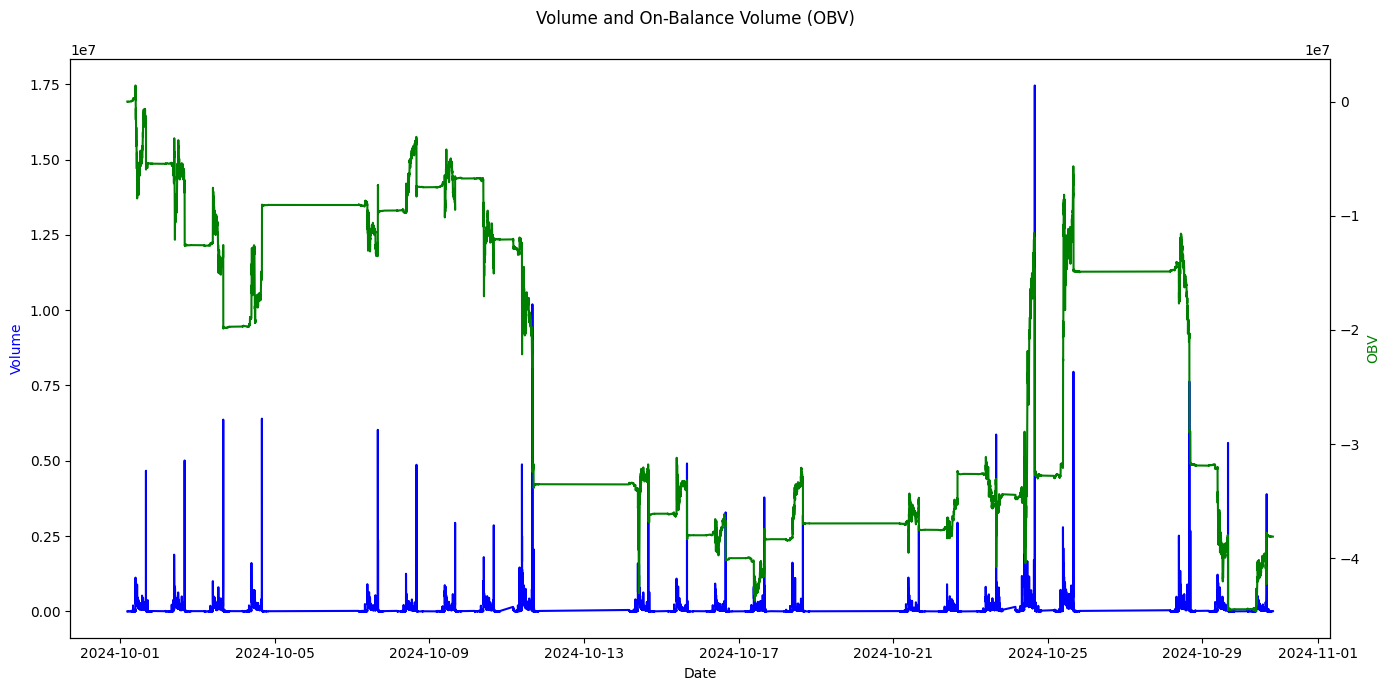

In [ ]:
fig, ax1 = plt.subplots(figsize=(14, 7))
ax1.plot(data_tesla.index, data_tesla['volume'], color='blue', label='Volume')
ax1.set_xlabel('Date')
ax1.set_ylabel('Volume', color='blue')
ax2 = ax1.twinx()
ax2.plot(data_tesla.index, data_tesla['obv'], color='green', label='OBV')
ax2.set_ylabel('OBV', color='green')
fig.suptitle('Volume and On-Balance Volume (OBV)')
fig.tight_layout()
plt.show()

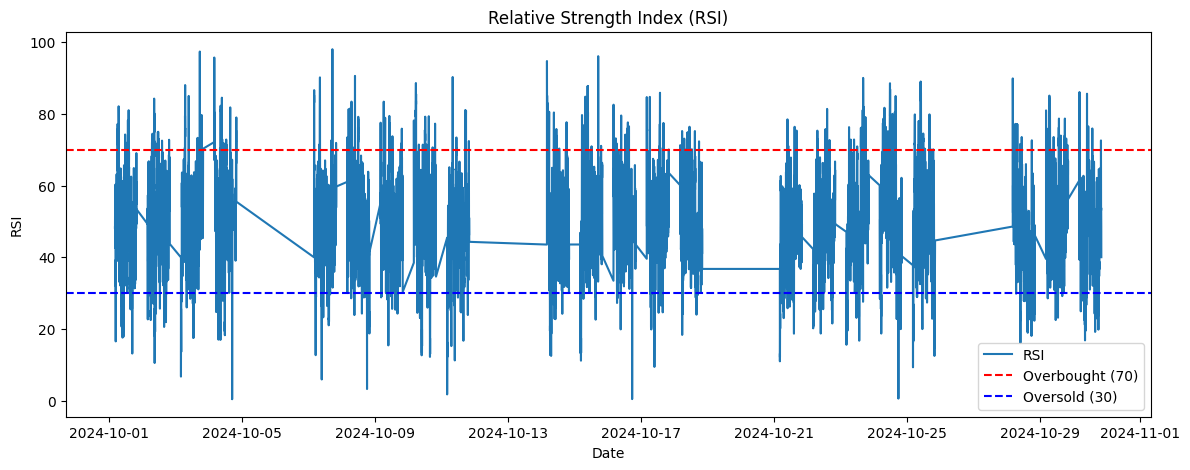

In [ ]:
plt.figure(figsize=(14, 5))
plt.plot(data_tesla.index, data_tesla['rsi'], label='RSI')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='blue', linestyle='--', label='Oversold (30)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.title('Relative Strength Index (RSI)')
plt.legend()
plt.show()

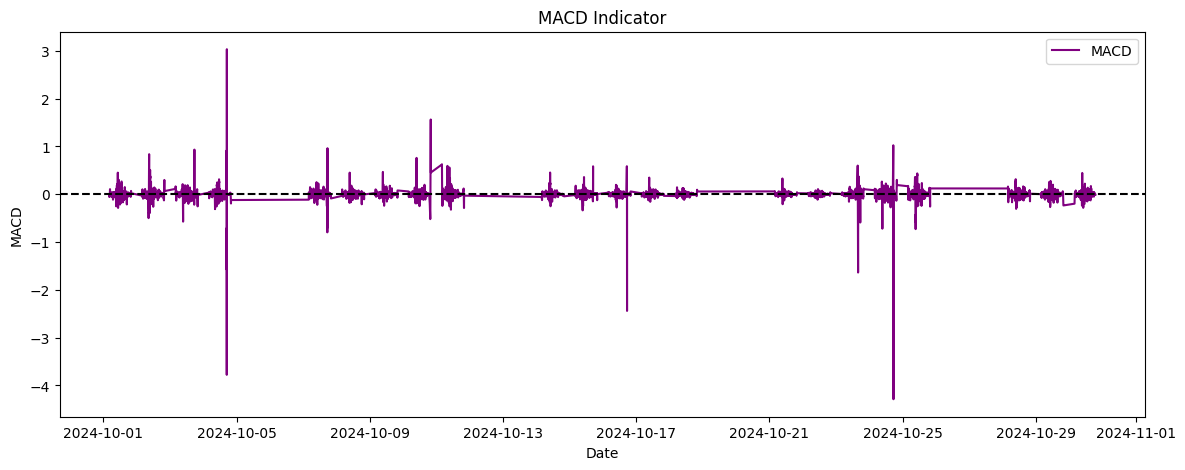

In [ ]:

'''
plt.figure(figsize=(14, 5))
plt.plot(data_tesla.index, data_tesla['macd'], label='MACD', color='purple')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.title('MACD Indicator')
plt.legend()
plt.show()
'''

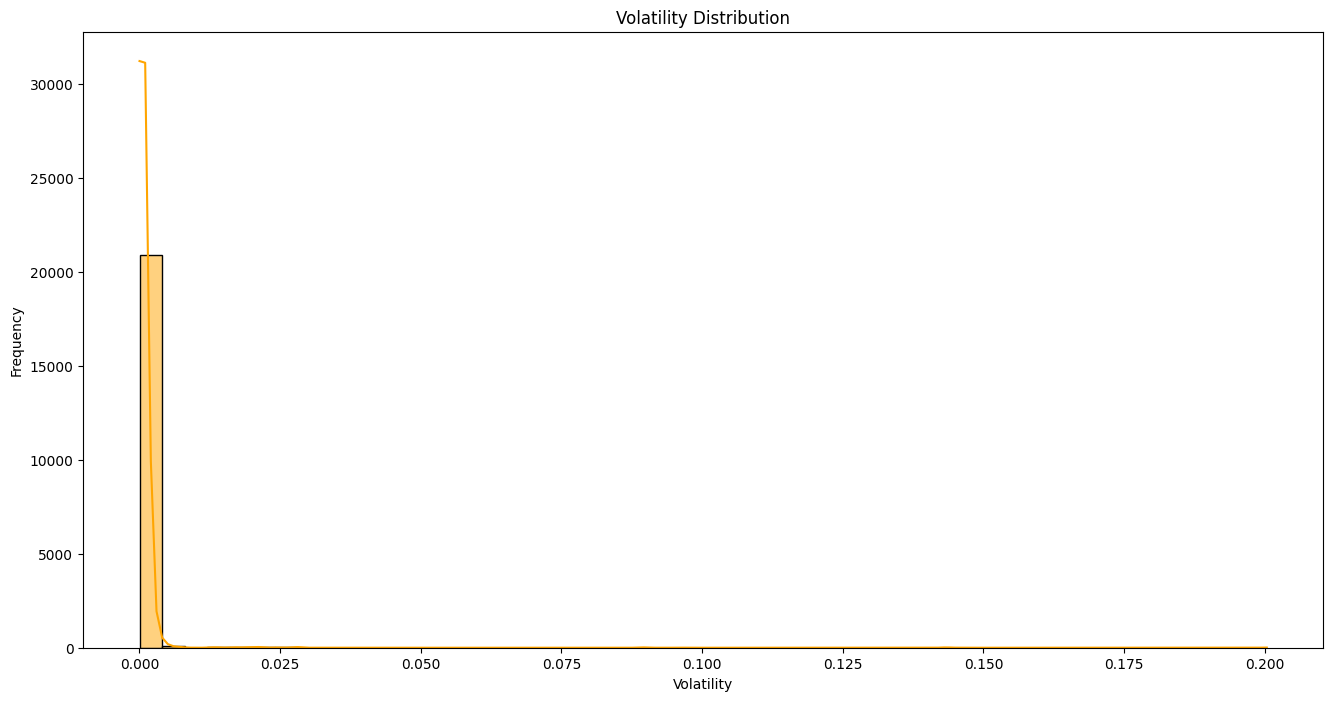

In [ ]:
plt.figure(figsize=(16, 8))
sns.histplot(data_tesla['volatility'].dropna(), bins=50, kde=True, color="orange")
plt.title('Volatility Distribution')
plt.xlabel('Volatility')
plt.ylabel('Frequency')
plt.show()

# 6. Target Class Distribution (Positive vs. Negative Returns)


<ipython-input-81-b75b959dd844>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data_tesla, x="target_cls", stat="count", multiple="dodge",


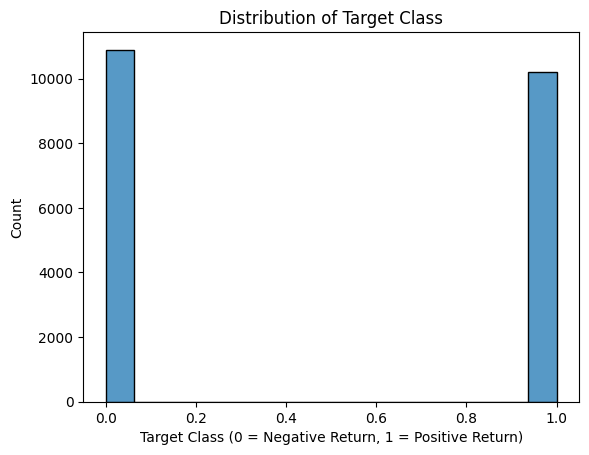

In [ ]:

sns.histplot(data=data_tesla, x="target_cls", stat="count", multiple="dodge",
             kde=False, palette="pastel", element="bars", legend=True)

plt.xlabel("Target Class (0 = Negative Return, 1 = Positive Return)")
plt.ylabel("Count")
plt.title("Distribution of Target Class")
plt.show()

In [ ]:
data_tesla['target_cls'].value_counts()

target_cls
0    10893
1    10197
Name: count, dtype: int64

our data is balnced for classification

## PCA
we will be using PCA to find the best set of features to predict the log *return*

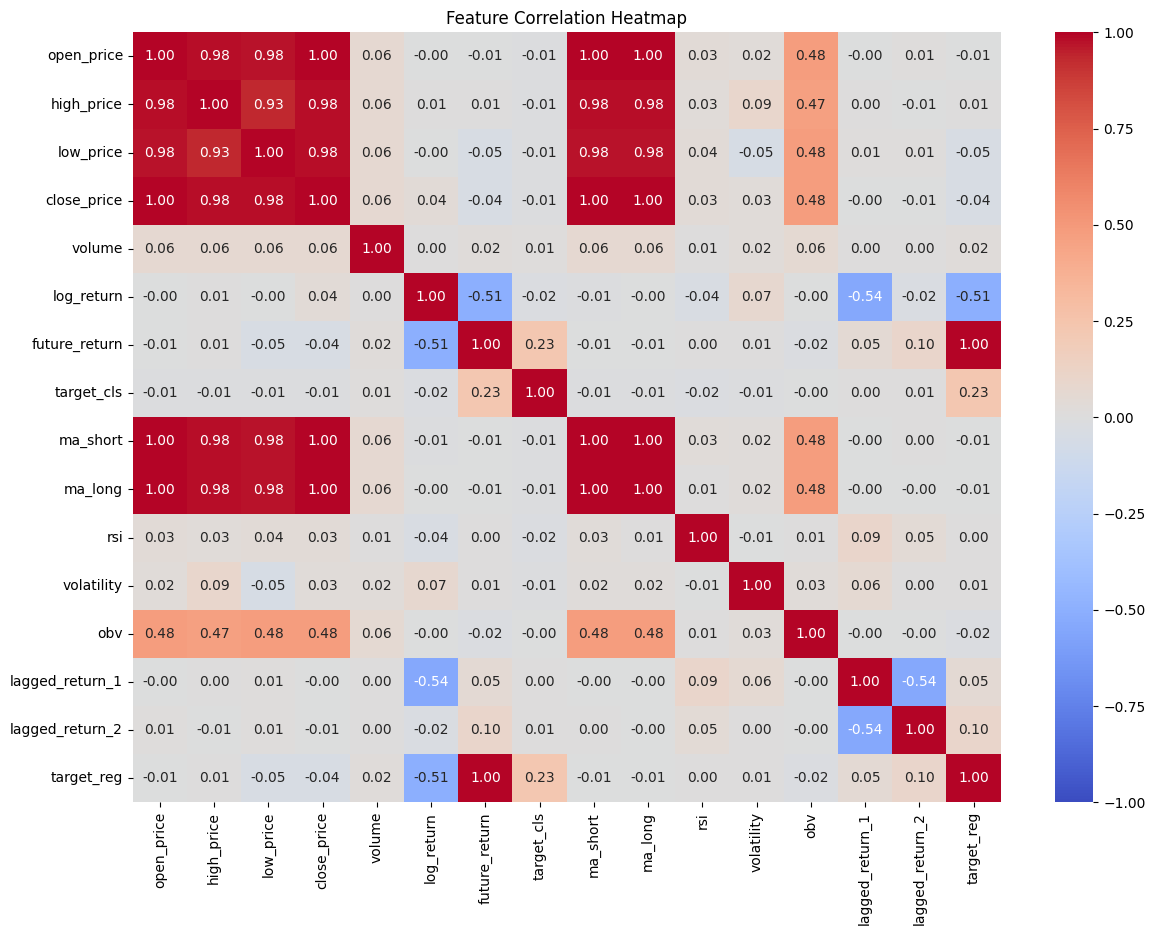

In [ ]:
numeric_features = data_tesla.select_dtypes(include=['float64', 'int64'])

# Creating a correlation matrix
correlation_matrix = numeric_features.corr()

# Plotting the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Feature Correlation Heatmap")
plt.show()

In [88]:
data_tesla.isna().sum()

open_price         0
high_price         0
low_price          0
close_price        0
volume             0
Stock_name         0
log_return         0
future_return      0
target_cls         0
ma_short           0
ma_long            0
rsi                0
volatility         0
obv                0
lagged_return_1    0
lagged_return_2    0
target_reg         0
dtype: int64

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier

# Assuming 'data_tesla' is your DataFrame and we are working on classification with 'target_cls'
X = data_tesla.drop(columns=['target_cls', 'target_reg', 'Stock_name','future_return'])  # Remove target and non-numeric features
y = data_tesla['target_cls']

# Train-test split (consider time-series split if relevant)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, shuffle=False)
# Step 1: Grid Search for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 4, 6,10,20],
    'min_samples_split': [2, 5],
    'max_features': [0.25,0.5,0.75,1, 'sqrt'],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Best parameters and model evaluation for Random Forest
best_rf_model = grid_search_rf.best_estimator_
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
y_pred_rf = best_rf_model.predict(X_val)
print("Random Forest Accuracy:", accuracy_score(y_val, y_pred_rf))
print("Classification Report for Random Forest:\n", classification_report(y_val, y_pred_rf))

# Step 2: Train and evaluate XGBoost
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_val)
print("XGBoost Accuracy:", accuracy_score(y_val, y_pred_xgb))
print("Classification Report for XGBoost:\n", classification_report(y_val, y_pred_xgb))

# Optional: Hyperparameter tuning for XGBoost using GridSearch
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 7, 14],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_xgb.fit(X_train, y_train)

# Best parameters and model evaluation for XGBoost
best_xgb_model = grid_search_xgb.best_estimator_
print("Best parameters for XGBoost:", grid_search_xgb.best_params_)
y_pred_best_xgb = best_xgb_model.predict(X_val)
print("Tuned XGBoost Accuracy:", accuracy_score(y_val, y_pred_best_xgb))
print("Classification Report for Tuned XGBoost:\n", classification_report(y_val, y_pred_best_xgb))


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters for Random Forest: {'max_depth': 6, 'max_features': 1, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Random Forest Accuracy: 0.48977777777777776
Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.49      0.24      0.32      1713
           1       0.49      0.75      0.59      1662

    accuracy                           0.49      3375
   macro avg       0.49      0.49      0.46      3375
weighted avg       0.49      0.49      0.45      3375



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:40:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.5013333333333333
Classification Report for XGBoost:
               precision    recall  f1-score   support

           0       0.51      0.35      0.42      1713
           1       0.50      0.66      0.56      1662

    accuracy                           0.50      3375
   macro avg       0.50      0.50      0.49      3375
weighted avg       0.50      0.50      0.49      3375



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:45:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters for XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 50, 'subsample': 1.0}
Tuned XGBoost Accuracy: 0.5277037037037037
Classification Report for Tuned XGBoost:
               precision    recall  f1-score   support

           0       0.54      0.52      0.53      1713
           1       0.52      0.54      0.53      1662

    accuracy                           0.53      3375
   macro avg       0.53      0.53      0.53      3375
weighted avg       0.53      0.53      0.53      3375



In [ ]:
final_model = best_rf_model  # or best_xgb_model if you found XGBoost to be better
y_test_pred = final_model.predict(X_test)

# Step 2: Predict on the test set

# Step 3: Evaluate metrics based on problem type
# Example for Classification
print("Final Model Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))


Final Model Test Accuracy: 0.5464675201517307
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.97      0.70      2284
           1       0.57      0.05      0.09      1934

    accuracy                           0.55      4218
   macro avg       0.56      0.51      0.39      4218
weighted avg       0.56      0.55      0.42      4218



In [ ]:
data_tesla.head(20)

open_price  high_price  low_price  close_price   volume  \
date                                                                           
2024-10-30 19:05:00    256.0400     256.090     256.03      256.050    339.0   
2024-10-30 19:04:00    256.0550     256.090     256.03      256.090   2732.0   
2024-10-30 19:03:00    256.0650     256.080     256.03      256.030   1490.0   
2024-10-30 19:02:00    256.0800     256.080     256.03      256.080    978.0   
2024-10-30 19:01:00    256.0700     256.100     256.03      256.055   2798.0   
2024-10-30 19:00:00    256.0400     256.070     256.02      256.020   1601.0   
2024-10-30 18:59:00    256.0294     256.070     256.01      256.070   3625.0   
2024-10-30 18:58:00    256.0200     256.030     256.01      256.030   4726.0   
2024-10-30 18:57:00    256.0500     256.070     256.01      256.020   3556.0   
2024-10-30 18:56:00    256.0700     256.070     256.01      256.050   1790.0   
2024-10-30 18:55:00    256.0300     256.098     256.03      256.060   1115.0   
2024-10-30 18:54:00    256.0300     256.100     256.02      256.080    719.0   
2024-10-30 18:53:00    256.0550     256.100     256.03      256.040     77.0   
2024-10-30 18:52:00    256.0200     256.110     256.01      256.100    922.0   
2024-10-30 18:51:00    256.0800     256.180     256.01      256.020   8083.0   
2024-10-30 18:50:00    256.0800     256.180     256.01      256.090  10000.0   
2024-10-30 18:49:00    256.0700     256.180     256.07      256.130    778.0   
2024-10-30 18:48:00    256.0700     256.180     256.06      256.070   2127.0   
2024-10-30 18:47:00    256.0600     256.200     256.06      256.100   2439.0   
2024-10-30 18:46:00    256.2000     256.200     256.08      256.080   1589.0   

                    Stock_name  log_return  future_return  target_reg  \
date                                                                    
2024-10-30 19:05:00      Tesla    0.000071      -0.000117   -0.000117   
2024-10-30 19:04:00      Tesla    0.000156      -0.000078   -0.000078   
2024-10-30 19:03:00      Tesla   -0.000234       0.000000    0.000000   
2024-10-30 19:02:00      Tesla    0.000195      -0.000234   -0.000234   
2024-10-30 19:01:00      Tesla   -0.000098      -0.000020   -0.000020   
2024-10-30 19:00:00      Tesla   -0.000137       0.000156    0.000156   
2024-10-30 18:59:00      Tesla    0.000195       0.000039    0.000039   
2024-10-30 18:58:00      Tesla   -0.000156       0.000039    0.000039   
2024-10-30 18:57:00      Tesla   -0.000039       0.000312    0.000312   
2024-10-30 18:56:00      Tesla    0.000117      -0.000117   -0.000117   
2024-10-30 18:55:00      Tesla    0.000039       0.000117    0.000117   
2024-10-30 18:54:00      Tesla    0.000078       0.000195    0.000195   
2024-10-30 18:53:00      Tesla   -0.000156       0.000117    0.000117   
2024-10-30 18:52:00      Tesla    0.000234       0.000000    0.000000   
2024-10-30 18:51:00      Tesla   -0.000312       0.000234    0.000234   
2024-10-30 18:50:00      Tesla    0.000273       0.000430    0.000430   
2024-10-30 18:49:00      Tesla    0.000156      -0.000273   -0.000273   
2024-10-30 18:48:00      Tesla   -0.000234      -0.000079   -0.000079   
2024-10-30 18:47:00      Tesla    0.000117      -0.000156   -0.000156   
2024-10-30 18:46:00      Tesla   -0.000078       0.000000    0.000000   

                     target_cls   ma_short     ma_long        rsi  volatility  \
date                                                                            
2024-10-30 19:05:00           0  256.06834  256.119500  36.827363    0.000133   
2024-10-30 19:04:00           0  256.06034  256.118500  39.702372    0.000126   
2024-10-30 19:03:00           0  256.05834  256.117500  45.536905    0.000139   
2024-10-30 19:02:00           0  256.05434  256.116500  39.381286    0.000132   
2024-10-30 19:01:00           0  256.05634  256.116500  45.939583    0.000148   
2024-10-30 19:00:00           1  256.06100  256.114250  43.410661    0.000150   
2024-

In [ ]:
data_ford.dropna(inplace=True)
data_ford.head(10)

1. open  2. high   3. low  4. close  5. volume  \
date                                                                  
2024-10-30 19:39:00  10.4500    10.46  10.4500   10.4600     1704.0   
2024-10-30 19:38:00  10.4399    10.46  10.4399   10.4600     1837.0   
2024-10-30 19:37:00  10.4300    10.44  10.4300   10.4350     1055.0   
2024-10-30 19:36:00  10.4400    10.44  10.4200   10.4300     2778.0   
2024-10-30 19:35:00  10.4200    10.43  10.4100   10.4200      657.0   
2024-10-30 19:34:00  10.4250    10.43  10.4108   10.4108      726.0   
2024-10-30 19:33:00  10.4400    10.44  10.4300   10.4300       11.0   
2024-10-30 19:32:00  10.4400    10.44  10.4200   10.4200       21.0   
2024-10-30 19:30:00  10.4400    10.44  10.4400   10.4400        6.0   
2024-10-30 19:29:00  10.4400    10.44  10.4100   10.4400       62.0   

                    Stock_name  log_return  future_return  target_reg  \
date                                                                    
2024-10-30 19:39:00       Ford    0.000000      -0.004704   -0.004704   
2024-10-30 19:38:00       Ford    0.000000      -0.002868   -0.002868   
2024-10-30 19:37:00       Ford   -0.002393      -0.001437   -0.001437   
2024-10-30 19:36:00       Ford   -0.000479       0.000959    0.000959   
2024-10-30 19:35:00       Ford   -0.000959       0.001919    0.001919   
2024-10-30 19:34:00       Ford   -0.000883       0.001364    0.001364   
2024-10-30 19:33:00       Ford    0.001843      -0.001918   -0.001918   
2024-10-30 19:32:00       Ford   -0.000959       0.001919    0.001919   
2024-10-30 19:30:00       Ford    0.001918      -0.003831   -0.003831   
2024-10-30 19:29:00       Ford    0.000000      -0.000479   -0.000479   

                     target_cls  ma_short    ma_long        rsi  volatility  \
date                                                                          
2024-10-30 19:39:00           0  10.45800  10.440275  58.026165    0.001481   
2024-10-30 19:38:00           0  10.45800  10.442255  58.026165    0.001033   
2024-10-30 19:37:00           0  10.45800  10.442255  58.026165    0.000605   
2024-10-30 19:36:00           1  10.45500  10.443505  47.213203    0.000958   
2024-10-30 19:35:00           1  10.44900  10.443505  45.391369    0.000962   
2024-10-30 19:34:00           1  10.44100  10.443005  41.908315    0.000897   
2024-10-30 19:33:00           0  10.43116  10.441795  38.947324    0.000898   
2024-10-30 19:32:00           1  10.42516  10.442795  47.313621    0.001157   
2024-10-30 19:30:00           0  10.42216  10.443295  43.936566    0.001158   
2024-10-30 19:29:00           0  10.42416  10.442295  51.406918    0.001303   

                         obv  lagged_return_1  lagged_return_2  
date                                                            
2024-10-30 19:39:00  11376.0         0.000000         0.000956  
2024-10-30 19:38:00  13080.0         0.000000         0.000000  
2024-10-30 19:37:00  14917.0         0.000000         0.000000  
2024-10-30 19:36:00  13862.0        -0.002393         0.000000  
2024-10-30 19:35:00  11084.0        -0.000479        -0.002393  
2024-10-30 19:34:00  10427.0        -0.000959        -0.000479  
2024-10-30 19:33:00   9701.0        -0.000883        -0.000959  
2024-10-30 19:32:00   9712.0         0.001843        -0.000883  
2024-10-30 19:30:00   9691.0        -0.000959         0.001843  
2024-10-30 19:29:00   9697.0         0.001918        -0.000959

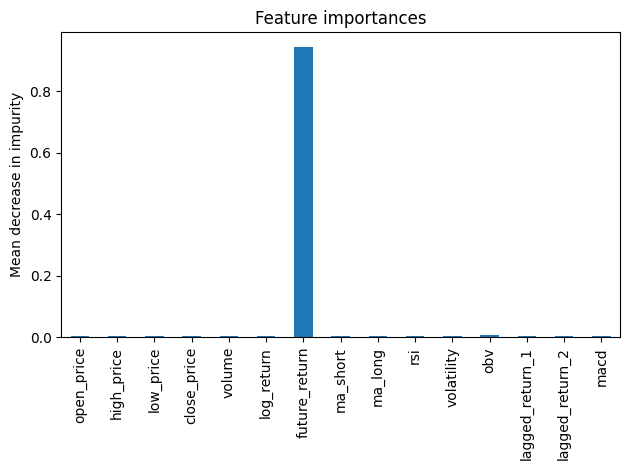

In [ ]:
importances = grid_search_rf.best_estimator_.feature_importances_
rf_importances = pd.Series(importances, index=X.columns)

fig, ax = plt.subplots()
rf_importances.plot.bar(ax=ax)
ax.set_title('Feature importances')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout()

In [87]:
macd = ta.trend.MACD(data_ford['close_price']).macd_diff().shift(1)
data_ford['macd'] = macd


In [89]:
data_tesla.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21090 entries, 2024-10-01 04:25:00 to 2024-10-30 19:54:00
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   open_price       21090 non-null  float64
 1   high_price       21090 non-null  float64
 2   low_price        21090 non-null  float64
 3   close_price      21090 non-null  float64
 4   volume           21090 non-null  float64
 5   Stock_name       21090 non-null  object 
 6   log_return       21090 non-null  float64
 7   future_return    21090 non-null  float64
 8   target_cls       21090 non-null  int64  
 9   ma_short         21090 non-null  float64
 10  ma_long          21090 non-null  float64
 11  rsi              21090 non-null  float64
 12  volatility       21090 non-null  float64
 13  obv              21090 non-null  float64
 14  lagged_return_1  21090 non-null  float64
 15  lagged_return_2  21090 non-null  float64
 16  target_reg       21090 

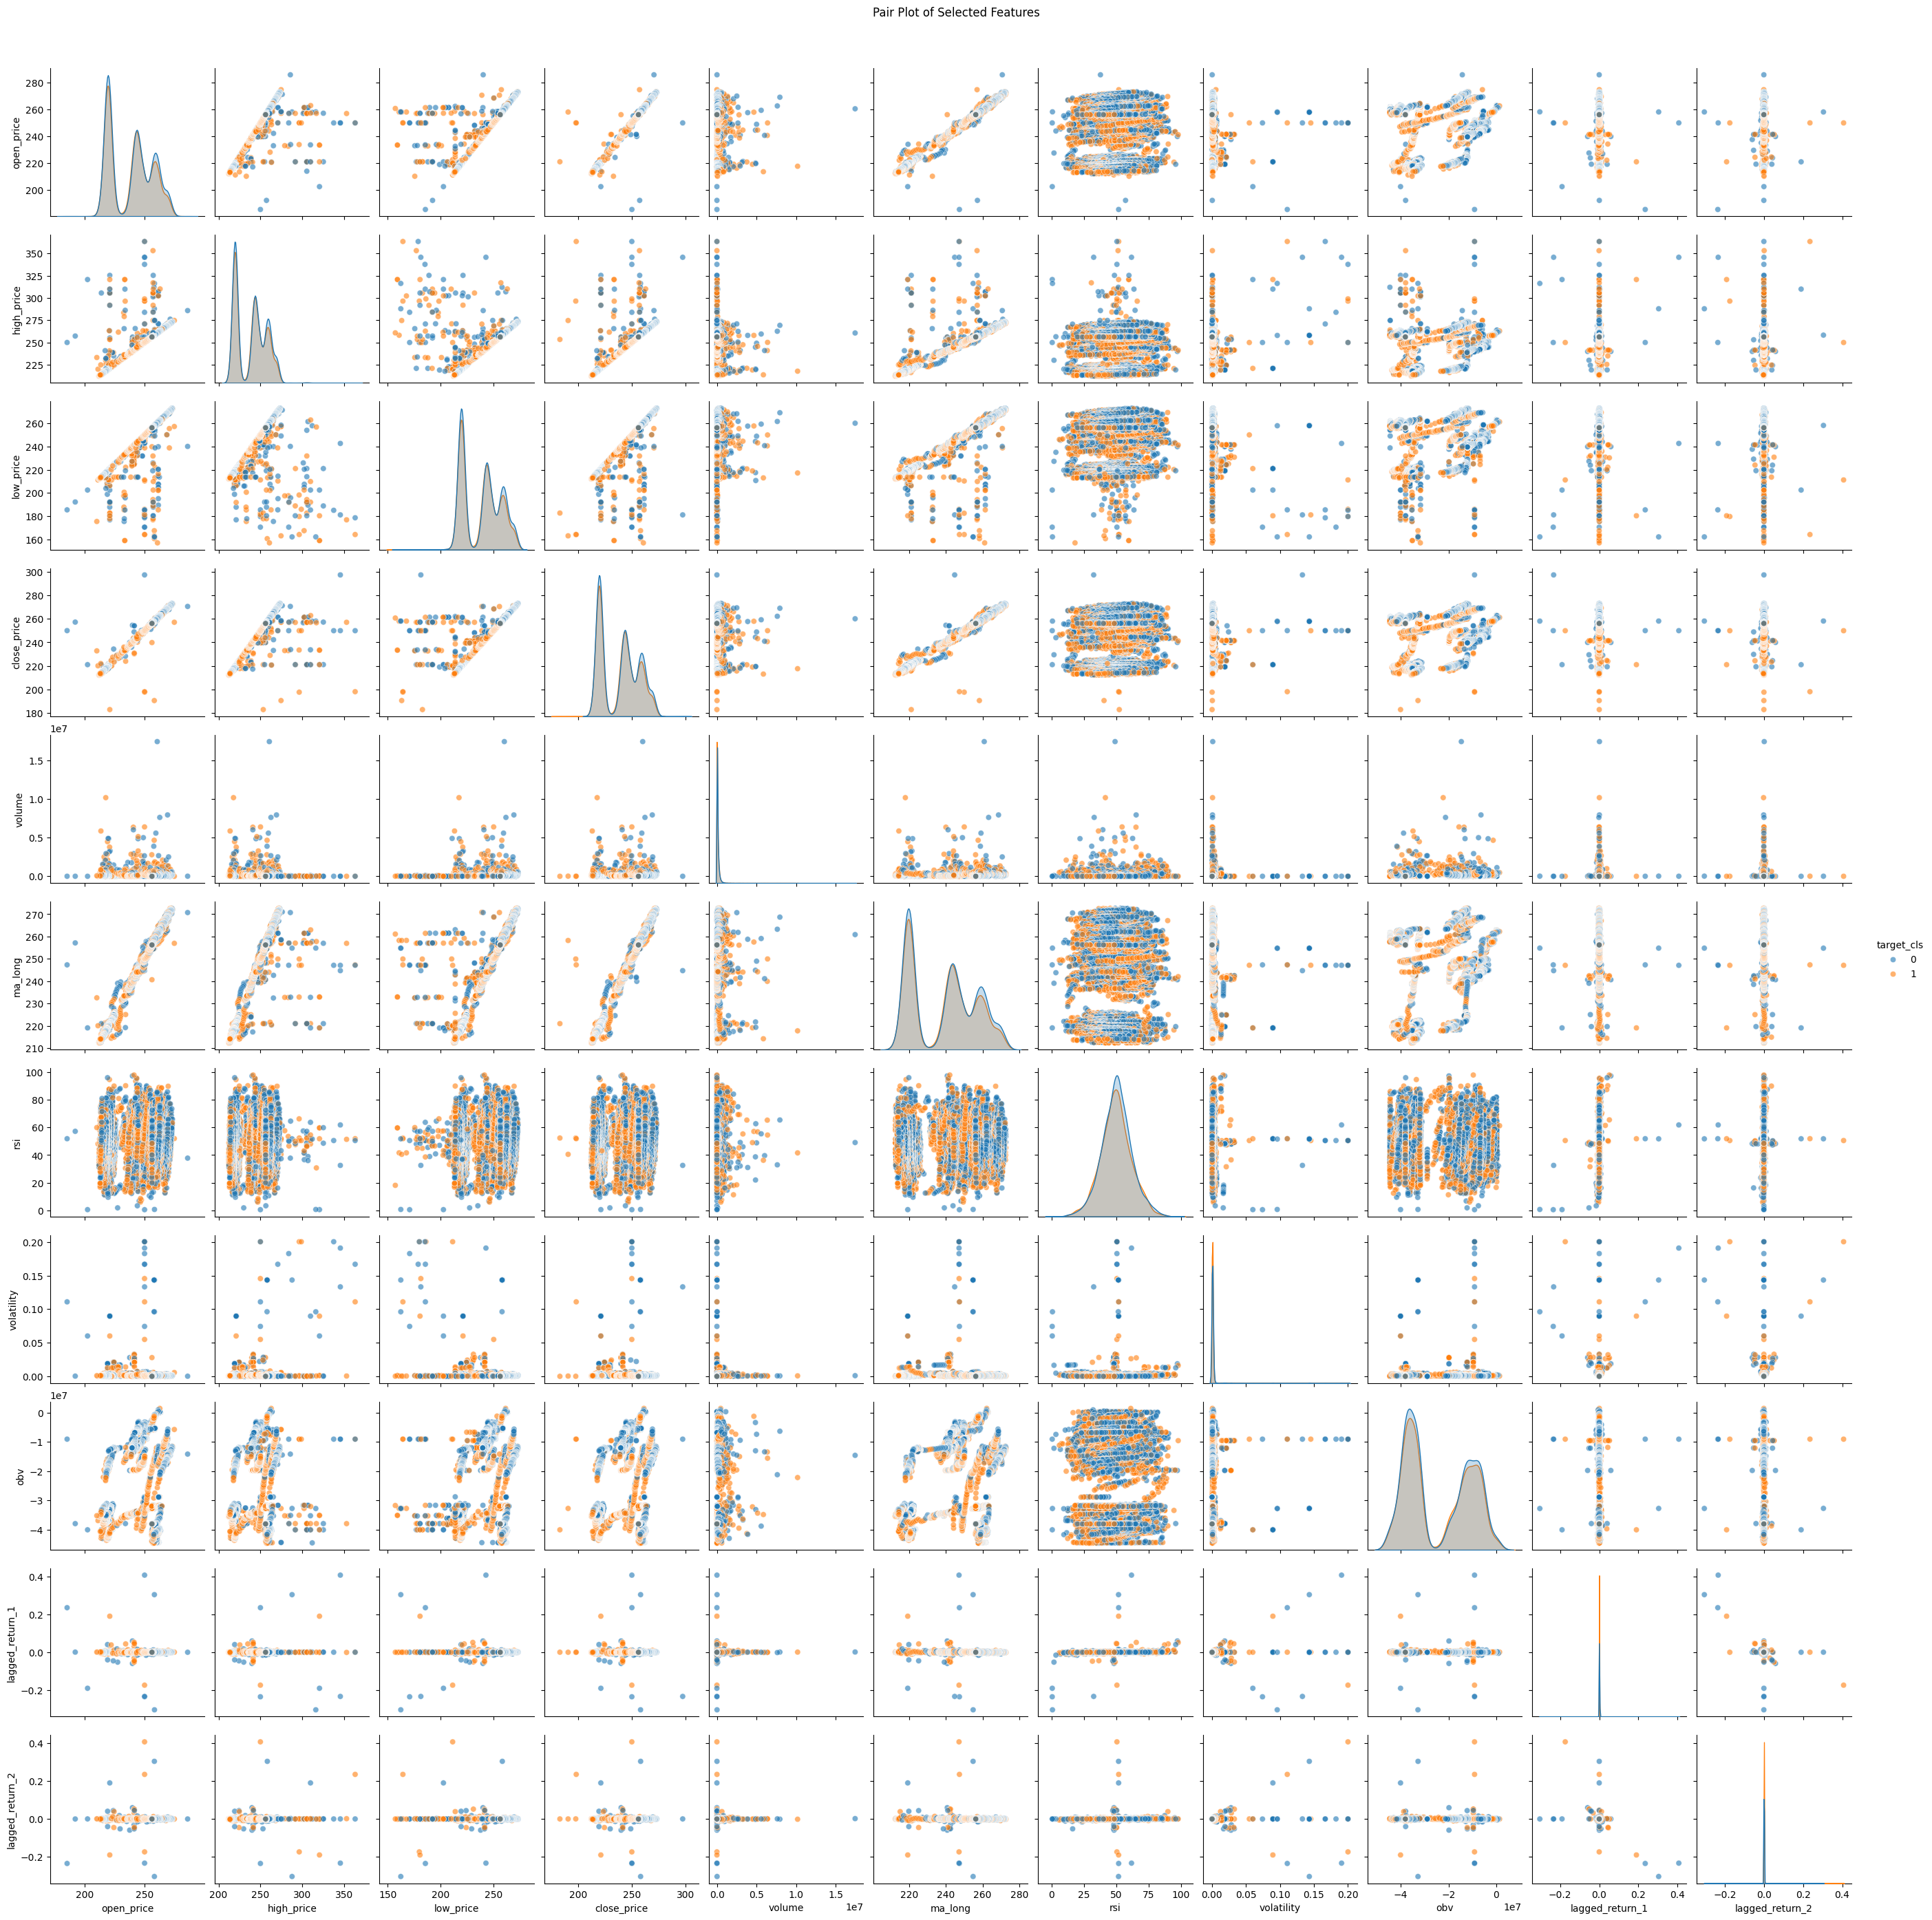

In [94]:
selected_features = ['open_price', 'high_price', 'low_price', 'close_price', 'volume', 'target_cls', 'ma_long'
 ,'rsi'  , 'volatility', 'obv', 'lagged_return_1', 'lagged_return_2']

# Creating a pair plot
sns.pairplot(data_tesla[selected_features], hue="target_cls", diag_kind="kde", plot_kws={'alpha':0.6})
plt.suptitle("Pair Plot of Selected Features", y=1.02)  # Adjust title position for spacing
plt.show()

## PCA

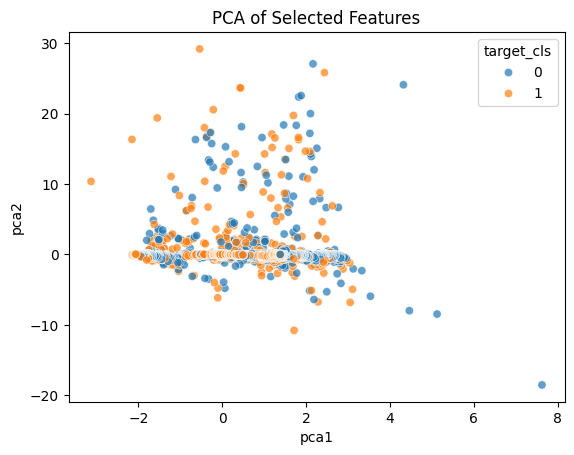

In [95]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Create derived features
data_tesla['price_range'] = data_tesla['high_price'] - data_tesla['low_price']
data_tesla['avg_price'] = (data_tesla['open_price'] + data_tesla['high_price'] + data_tesla['low_price'] + data_tesla['close_price']) / 4

# Selecting basic and derived features
selected_features = ['close_price', 'volume', 'price_range', 'avg_price']
X_selected = data_tesla[selected_features]

# Standardize features before PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
data_tesla[['pca1', 'pca2']] = X_pca

# Plotting the PCA components
sns.scatterplot(x='pca1', y='pca2', hue=data_tesla['target_cls'], data=data_tesla, alpha=0.7)
plt.title("PCA of Selected Features")
plt.show()

In [ ]:
target_columns = [
    'open_price', 'high_price', 'low_price', 'close_price', 'volume', 'Stock_name',
    'log_return', 'future_return', 'target_reg', 'target_cls',
    'ma_short', 'ma_long', 'rsi', 'macd', 'volatility', 'obv', 'lagged_return_1', 'lagged_return_2'
]

# Reorder and add missing columns in data_ford to match data_tesla
data_ford = data_ford.reindex(columns=target_columns)

# Display the reordered data_ford info to verify alignment
print(data_ford.info())

In [ ]:
# Adjusted feature engineering to ensure only past data is used
data_ford['log_return'] = np.log(data_ford['close_price'] / data_ford['close_price'].shift(1))
holding_period = 5
data_ford['future_return'] = data_ford['close_price'].shift(-holding_period) / data_ford['close_price'] - 1
data_ford['target_cls'] = np.where(data_ford['future_return'] > 0, 1, 0)  # target_cls derived correctly

# Ensure all features that use rolling or shifting are shifted by 1 period to avoid future data influence
data_ford['ma_short'] = data_ford['close_price'].rolling(window=5).mean().shift(1)
data_ford['ma_long'] = data_ford['close_price'].rolling(window=20).mean().shift(1)
data_ford['rsi'] = ta.momentum.RSIIndicator(data_ford['close_price'], window=14).rsi().shift(1)
data_ford['volatility'] = data_ford['log_return'].rolling(window=10).std().shift(1)
data_ford['obv'] = ta.volume.OnBalanceVolumeIndicator(data_ford['close_price'], data_ford['volume']).on_balance_volume().shift(1)
data_ford['lagged_return_1'] = data_ford['log_return'].shift(1)
data_ford['lagged_return_2'] = data_ford['log_return'].shift(2)


In [ ]:

# Assuming 'data_tesla' is your DataFrame and we are working on classification with 'target_cls'
X = data_ford.drop(columns=['target_cls', 'target_reg', 'Stock_name'])  # Remove target and non-numeric features
y = data_ford['target_cls']

y_test_pred = final_model.predict(X)

# Step 2: Predict on the test set

# Step 3: Evaluate metrics based on problem type
# Example for Classification
print("Final Model Test Accuracy:", accuracy_score(y, y_test_pred))
print("Classification Report:\n", classification_report(y, y_test_pred))


In [ ]:
importances = best_rf_model.best_estimator_.feature_importances_
rf_importances = pd.Series(importances, index=X.columns)

fig, ax = plt.subplots()
rf_importances.plot.bar(ax=ax)
ax.set_title('Feature importances')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout()

# key points

- we experienced data leakage at the beginning of our analysis our model was performing accurately a 100% of the time
- After removing the future price feature and ensuring that we shift the necessary rows backwards or forwards, there was no leakage, but our model performed really bad, even worse than random guessing
- We will be changing our approach b trying to predict the stock log return every day instead of every minute or every 5 minutes, this should reduce the noise in the data, and hopefully we will get some pattern that our model can learn.
